## Football Player Market Value

## Problem 
## understand which variables increase the player's market value
## make predictions on the market value 
## identify over/under preforming players based on their market value

In [14]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px
import streamlit as st


In [26]:
import pandas as pd

# Load the dataset
player_raw = pd.read_csv("Player_Stats.csv", encoding="latin1", delimiter=";")

# Set options to display more columns and rows without truncation
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', 20)  # Show up to 20 rows
pd.set_option('display.width', 1000)  # Adjust the width of the display
pd.set_option('display.max_colwidth', None)  # Show full content in each cell

# Now display the first few rows
player_raw.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


## pulling the market value of the players

In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Assuming player_raw is defined elsewhere, like a DataFrame with a 'Player' column
player_list = player_raw['Player'].unique()  # Uncomment and define player_raw correctly if it's available
# player_list = ["Brenden Aaronson", "Yunis Abdelhamid", "Himad AbdelLi"]  # Example list of player names

# Base URL for player search
base_url = "https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query="

# DataFrame to store results
results = []

# Total number of players
total_players = len(player_list)

# Iterate through the player list with a counter
for i, player in enumerate(player_list, start=1):
    # Format the player name for the URL (replace spaces with '+')
    search_url = base_url + player.replace(" ", "+")
    
    print(f"Processing player {i}/{total_players}: {player}")
    
    try:
        # Fetch the page
        response = requests.get(search_url, headers={"User-Agent": "Mozilla/5.0"})
        response.raise_for_status()  # Raise error if status code is not 200
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the market value
        market_value_tag = soup.find("td", class_="rechts hauptlink")  # Target the specific class
        if market_value_tag:
            market_value = market_value_tag.text.strip()
        else:
            market_value = "Not Found"
        
        # Append the result
        results.append({"Player": player, "Market Value": market_value})
    
    except Exception as e:
        results.append({"Player": player, "Market Value": "Error: " + str(e)})
    
    # Pause to avoid being blocked by the website
    time.sleep(2)

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Display or save the DataFrame
print(df_results)
df_results.to_csv("player_market_values.csv", index=False)


Processing player 1/2530: Brenden Aaronson
Processing player 2/2530: Yunis Abdelhamid
Processing player 3/2530: Himad Abdelli
Processing player 4/2530: Salis Abdul Samed
Processing player 5/2530: Laurent Abergel
Processing player 6/2530: Oliver Abildgaard
Processing player 7/2530: Matthis Abline
Processing player 8/2530: Abner
Processing player 9/2530: Zakaria Aboukhlal
Processing player 10/2530: Tammy Abraham
Processing player 11/2530: Francesco Acerbi
Processing player 12/2530: Mohamed Achi
Processing player 13/2530: Marcos Acuña
Processing player 14/2530: Che Adams
Processing player 15/2530: Tyler Adams
Processing player 16/2530: Sargis Adamyan
Processing player 17/2530: Tosin Adarabioyo
Processing player 18/2530: Martin Adeline
Processing player 19/2530: Karim Adeyemi
Processing player 20/2530: Amine Adli
Processing player 21/2530: Yacine Adli
Processing player 22/2530: Michel Aebischer
Processing player 23/2530: Felix Afena-Gyan
Processing player 24/2530: Emmanuel Agbadou
Processi

In [33]:
df_results.head()

,Player,Market Value
0,Brenden Aaronson,€14.00m
1,Yunis Abdelhamid,€500k
2,Himad Abdelli,€7.00m
3,Salis Abdul Samed,€5.50m
4,Laurent Abergel,€2.50m


 ## cleaning and joining the market value data with the player data

In [35]:

# Loading the data back in
df_results_2 = pd.read_csv("player_market_values.csv")

# Removing the data that we could not pull Market Value
df_results_2 = df_results_2[df_results_2['Market Value'] != 'Not Found']
df_results_2 = df_results_2[df_results_2['Market Value'] != '-']

# Conversion function
def convert_market_value(value):
    value = value.replace("€", "").replace(",", "").strip().lower()  # Clean the string
    if "m" in value:
        return float(value.replace("m", "")) * 1_000_000  # Convert millions
    elif "k" in value:
        return float(value.replace("k", "")) * 1_000       # Convert thousands
    else:
        return float(value)                                # Return numeric if no unit

# Apply the conversion
df_results_2["Market Value Euros"] = df_results_2["Market Value"].apply(convert_market_value)

# Joining the Market Value to the Main DF
print(player_raw.shape)
player_raw = player_raw.merge(df_results_2[['Player', 'Market Value Euros']], how='left', on='Player')
print(player_raw.shape)

# Filtering out players that we don't have market value
player_raw = player_raw[~player_raw['Market Value Euros'].isna()]
print(player_raw.shape)

# Displaying the first few rows
player_raw.head()


(2689, 124)
(2689, 125)
(2476, 125)


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Market Value Euros
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2,14000000.0
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0,500000.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1,7000000.0
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0,5500000.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,

## data preprocessing

## data understanding

In [36]:


# Investigate all the elements within each Feature
for column in player_raw.columns:
    unique_vals = np.unique(player_raw[column].fillna('0'))
    nr_values = len(unique_vals)

    if nr_values <= 12:
        print('The number of values for feature {}: {} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {}: {}'.format(column, nr_values))


The number of values for feature Rk: 2476
The number of values for feature Player: 2324
The number of values for feature Nation: 104
The number of values for feature Pos: 10 -- ['DF' 'DFFW' 'DFMF' 'FW' 'FWDF' 'FWMF' 'GK' 'MF' 'MFDF' 'MFFW']
The number of values for feature Squad: 98
The number of values for feature Comp: 5 -- ['Bundesliga' 'La Liga' 'Ligue 1' 'Premier League' 'Serie A']
The number of values for feature Age: 27
The number of values for feature Born: 27
The number of values for feature MP: 23
The number of values for feature Starts: 24
The number of values for feature Min: 1252
The number of values for feature 90s: 218
The number of values for feature Goals: 18
The number of values for feature Shots: 372
The number of values for feature SoT: 182
The number of values for feature SoT%: 217
The number of values for feature G/Sh: 41
The number of values for feature G/SoT: 58
The number of values for feature ShoDist: 280
The number of values for feature ShoFK: 66
The number o

## missing values

In [39]:
pd.set_option('display.max_rows', None)   # Show all rows (features)
pd.set_option('display.max_columns', None)  # Show all columns if needed

# Show missing values per column
print(player_raw.isnull().sum())



Rk                    0
Player                0
Nation                1
Pos                   0
Squad                 0
Comp                  0
Age                   0
Born                  0
MP                    0
Starts                0
Min                   0
90s                   0
Goals                 0
Shots                 0
SoT                   0
SoT%                  0
G/Sh                  0
G/SoT                 0
ShoDist               0
ShoFK                 0
ShoPK                 0
PKatt                 0
PasTotCmp             0
PasTotAtt             0
PasTotCmp%            0
PasTotDist            0
PasTotPrgDist         0
PasShoCmp             0
PasShoAtt             0
PasShoCmp%            0
PasMedCmp             0
PasMedAtt             0
PasMedCmp%            0
PasLonCmp             0
PasLonAtt             0
PasLonCmp%            0
Assists               0
PasAss                0
Pas3rd                0
PPA                   0
CrsPA                 0
PasProg         

In [42]:
# fixing the NA value 
player_raw['Nation'] = player_raw['Nation'].fillna('Other')

In [46]:
#checking players that are duplicated
player_raw[player_raw.duplicated('Player',keep=False ) == True].head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Market Value Euros
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,185,2.1,1,4.29,1.43,33.3,0.11,0.33,20.4,0.00,0.00,0.00,7.14,10.0,71.4,139.5,40.0,1.43,2.38,60.0,4.76,5.24,90.9,0.48,0.95,50.0,0.00,0.00,0.48,1.43,0.48,1.90,10.0,9.05,0.95,0.00,0.00,0.00,0.95,0.00,0.0,0.0,0.0,0.0,7.14,0.00,0.48,0.48,0.48,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,1.43,0.48,0.00,0.95,0.48,0.00,0.95,0.0,0.95,0.48,0.00,0.48,0.48,1.90,0.48,0.0,25.7,0.48,1.43,11.4,12.9,6.67,25.7,1.43,0.48,33.3,0.95,66.7,17.1,97.1,10.5,1.43,0.00,0.95,7.62,3.33,19.0,6.67,0.00,0.00,0.00,0.95,1.43,0.48,0.95,0.48,0.00,0.00,0.0,0.48,1.43,1.43,50.0,12000000.0
7,8,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,107,1.2,1,5.00,1.67,33.3,0.17,0.50,12.2,0.00,0.00,0.00,5.83,12.5,46.7,107.5,25.0,2.50,5.00,50.0,2.50,3.33,75.0,0.83,0.83,100.0,0.00,1.67,0.83,0.83,0.00,1.67,12.5,12.50,0.00,0.00,0.83,0.00,1.67,0.00,0.0,0.0,0.0,0.0,5.83,0.00,0.83,5.83,1.67,0.0,0.00,2.50,0.83,0.83,1.67,0.00,0.0,0.0,0.00,0.83,0.83,0.83,0.83,0.00,0.00,0.83,0.83,0.83,100.0,0.00,0.83,0.00,0.83,1.67,2.50,0.83,0.0,30.8,0.83,0.83,12.5,18.3,12.50,30.8,0.00,0.00,0.0,0.00,0.0,22.5,145.0,87.5,3.33,0.83,1.67,8.33,0.83,22.5,9.17,0.00,0.00,0.00,2.50,4.17,0.83,1.67,0.83,0.83,0.00,0.0,1.67,0.83,3.33,20.0,12000000.0
31,32,Naouirou Ahamada,FRA,MFFW,Crystal Palace,Premier League,20,2002,2,0,16,0.2,0,5.00,0.00,0.0,0.00,0.00,17.3,0.00,0.00,0.00,50.00,70.0,71.4,760.0,225.0,25.00,30.00,83.3,25.00,35.00,71.4,0.00,0.00,0.0,0.00,0.00,10.00,0.00,0.00,5.00,70.0,70.00,0.00,0.00,0.00,0.00,5.00,0.00,0.0,0.0,0.0,0.0,50.00,0.00,0.00,5.00,0.00,0.0,0.00,5.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,5.00,0.00,5.00,0.00,0.00,0.00,0.0,85.0,0.00,10.00,60.0,15.0,10.00,85.0,5.00,5.00,100.0,0.00,0.0,40.0,165.0,60.0,5.00,0.00,5.00,5.00,0.00,55.0,20.00,0.00,0.00,0.00,0.00,0.00,5.00,5.00,0.00,0.00,0.00,0.0,10.00,0.00,0.00,0.0,5000000.0
32,33,Naouirou Ahamada,FRA,MF,Stuttgart,Bundesliga,20,2002,17,17,1398,15.5,2,1.03,0.32,31.3,0.13,0.40,22.1,0.00,0.00,0.00,29.00,34.1,84.9,449.4,106.5,14.40,15.60,92.1,12.10,13.20,91.7,1.35,2.58,52.5,0.13,0.97,2.45,0.45,0.13,3.61,34.1,33.20,0.84,0.26,0.13,0.06,0.39,0.32,0.0,0.0,0.0,0.0,29.00,0.13,0.84,2.45,2.00,0.0,0.19,0.13,0.06,0.06,0.45,0.45,0.0,0.0,0.00,0.00,0.00,1.10,0.71,0.45,0.45,0.19,0.52,1.29,40.0,0.77,1.03,0.32,0.71,0.52,1.61,0.45,0.0,43.5,1.16,8.97,25.0,10.3,1.42,43.5,2.71,1.16,42.9,1.29,47.6,26.3,192.4,97.5,2.77,1.74,0.39,2.19,0.71,29.2,3.48,0.26,0.06,0.06,1.03,1.10,0.06,0.39,0.71,0.00,0.06,0.0,5.68,0.45,1.03,30.4,5000000.0
40,41,Ludovic Ajorque,FRA,FW,Strasbourg,Ligue 1,28,1994,13,9,771,8.6,1,2.56,0.81,31.8,0.00,0.00,15.1,0.12,0.12,0.12,20.70,29.7,69.8,304.0,46.2,12.00,15.90,75.2,6.40,9.19,69.6,1.28,1.86,68.8,0.00,1.16,1.16,0.70,0.00,1.51,29.7,28.10,1.16,0.12,0.35,0.35,0.00,0.00,0.0,0.0,0.0,0.0,20.70,0.35,0.12,2.56,2.33,0.0,0.00,0.23,0.00,0.00,0.23,0.12,0.0,0.0,0.12,0.00,0.00,0.58,0.47,0.12,0.47,0.00,0.35,1.05,33.3,0.70,0.35,0.12,0.23,0.23,0.81,0.81,0.0,39.1,0.93,3.60,20.0,15.8,5.81,39.0,0.47,0.23,50.0,0.23,50.0,26.2,104.8,23.5,0.23,0.81,0.12,2.21,1.16,30.5,6.40,0.12,0.0

In [51]:
# Aggregating the duplicated players
player_agg = player_raw.groupby(['Player'], as_index = False).agg({'Nation':'first', 'Pos':'first', 'Squad':'first', 'Comp':'first', 'Age':'first', 'MP':'sum', 'Starts':'sum',
        'Min':'sum', '90s':'sum', 'Goals':'sum', 'SoT':'sum', 'SoT%':'mean', 'G/Sh':'mean', 'G/SoT':'mean', 
         'ShoDist':'mean', 'ShoFK':'sum', 'ShoPK':'sum', 'PKatt':'sum', 'PasTotCmp':'sum', 'PasTotAtt':'sum', 'PasTotCmp%':'mean', 'PasTotDist':'sum',
         'PasTotPrgDist':'sum', 'PasShoCmp':'sum', 'PasShoAtt':'sum', 'PasShoCmp%':'mean', 'PasMedCmp':'sum', 
          'PasMedAtt':'sum', 'PasMedCmp%':'mean', 'PasLonCmp':'sum', 'PasLonAtt':'sum', 'PasLonCmp%':'mean', 'Assists':'sum', 'PasAss':'sum',
          'Pas3rd':'sum', 'PPA':'sum', 'CrsPA':'sum', 'PasProg':'sum', 'PasAtt':'sum', 'PasLive':'sum', 'PasDead':'sum', 'PasFK':'sum', 'TB':'sum', 'Sw':'sum', 'PasCrs':'sum',
        'TI':'sum', 'CK':'sum', 'CkIn':'sum', 'CkOut':'sum', 'CkStr':'sum', 'PasCmp':'sum', 'PasOff':'sum', 'PasBlocks':'sum', 'SCA':'sum', 'ScaPassLive':'sum', 
            'ScaPassDead':'sum', 'ScaDrib':'sum', 'ScaSh':'sum', 'ScaFld':'sum', 'ScaDef':'sum', 'GCA':'sum', 'GcaPassLive':'sum', 'GcaPassDead':'sum', 'GcaDrib':'sum',
         'GcaSh':'sum', 'GcaFld':'sum', 'GcaDef':'sum', 'Tkl':'sum', 'TklWon':'sum', 'TklDef3rd':'sum', 'TklMid3rd':'sum', 'TklAtt3rd':'sum', 'TklDri':'sum', 'TklDriAtt':'sum', 
        'TklDri%':'mean', 'TklDriPast':'sum', 'Blocks':'sum', 'BlkSh':'sum', 'BlkPass':'sum', 'Int':'sum', 'Tkl+Int':'sum', 'Clr':'sum', 'Err':'sum', 'Touches':'sum', 'TouDefPen':'sum', 'TouDef3rd':'sum', 'TouMid3rd':'sum', 'TouAtt3rd':'sum', 'TouAttPen':'sum'
        , 'TouLive':'sum', 'ToAtt':'sum', 'ToSuc':'sum', 'ToSuc%':'mean', 'ToTkl':'sum', 'ToTkl%':'mean', 'Carries':'sum', 'CarTotDist':'sum', 
         'CarPrgDist':'sum', 'CarProg':'sum', 'Car3rd':'sum', 'CPA':'sum', 'CarMis':'sum', 'CarDis':'sum', 'Rec':'sum', 'RecProg':'sum', 'CrdY':'sum', 
           'CrdR':'sum', '2CrdY':'sum', 'Fls':'sum', 'Fld':'sum', 'Off':'sum', 'Crs':'sum', 'TklW':'sum', 'PKwon':'sum', 'OG':'sum', 'Recov':'sum', 
        'AerWon':'sum', 'AerLost':'sum' , 'Market Value Euros':'mean'})

# checking for duplication again
player_agg[player_agg.duplicated('Player', keep=False) == True]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,OG,Recov,AerWon,AerLost,Market Value Euros


## Visualizing the data


In [52]:
player_agg.columns.values


array(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', '90s', 'Goals', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist',
       'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%',
       'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt',
       'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp',
       'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA',
       'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB',
       'Sw', 'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp',
       'PasOff', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead',
       'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive',
       'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl',
       'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri',
       'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass',
       'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches', 'TouDefPen',
       'TouDef3

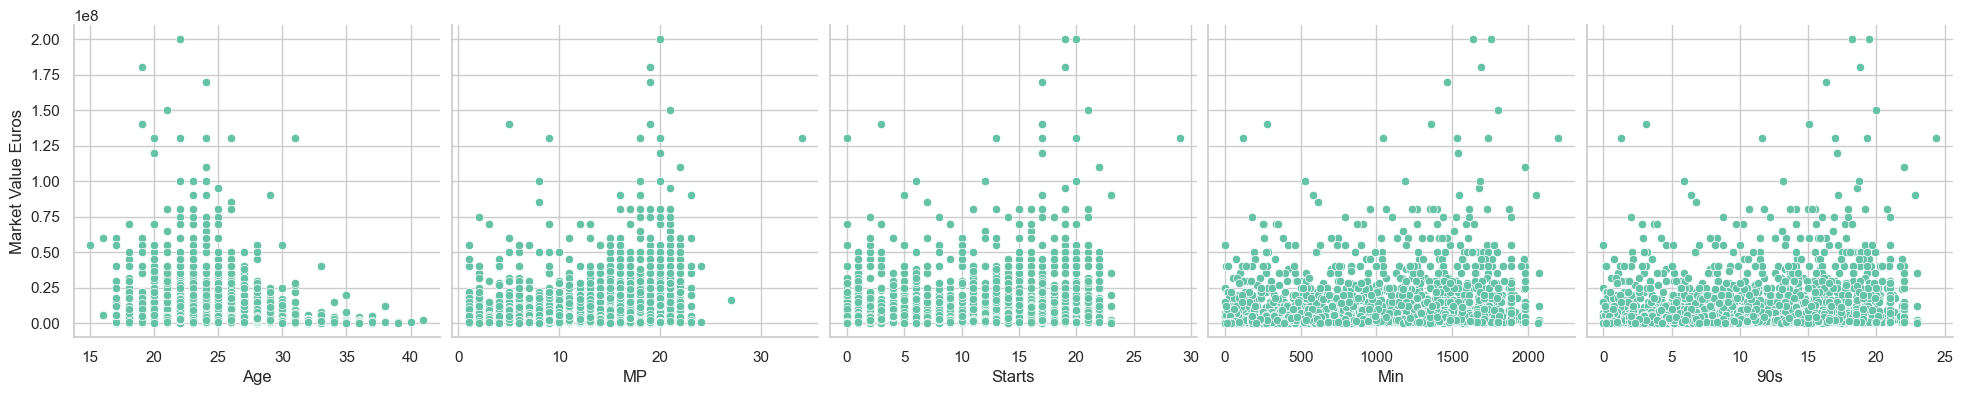

In [55]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['Age', 'MP', 'Starts', 'Min', '90s'], height = 4)


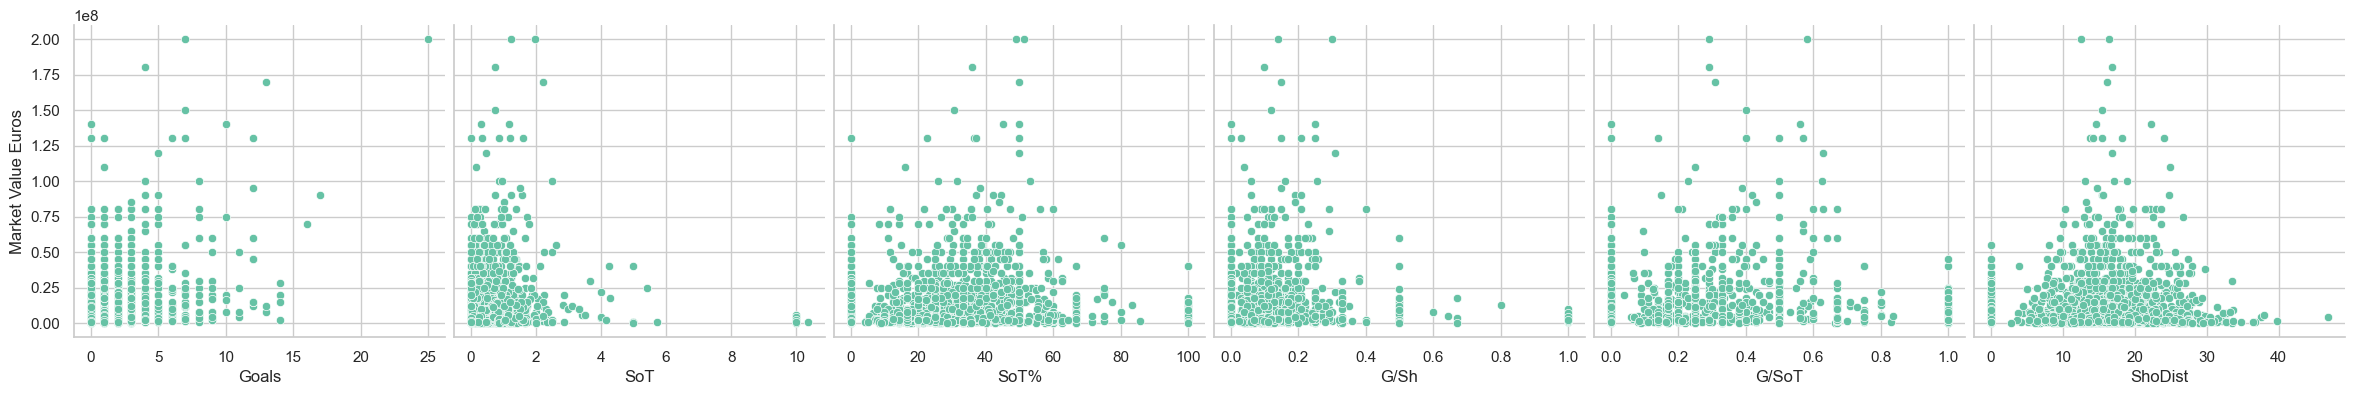

In [56]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['Goals', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist'], height = 4)


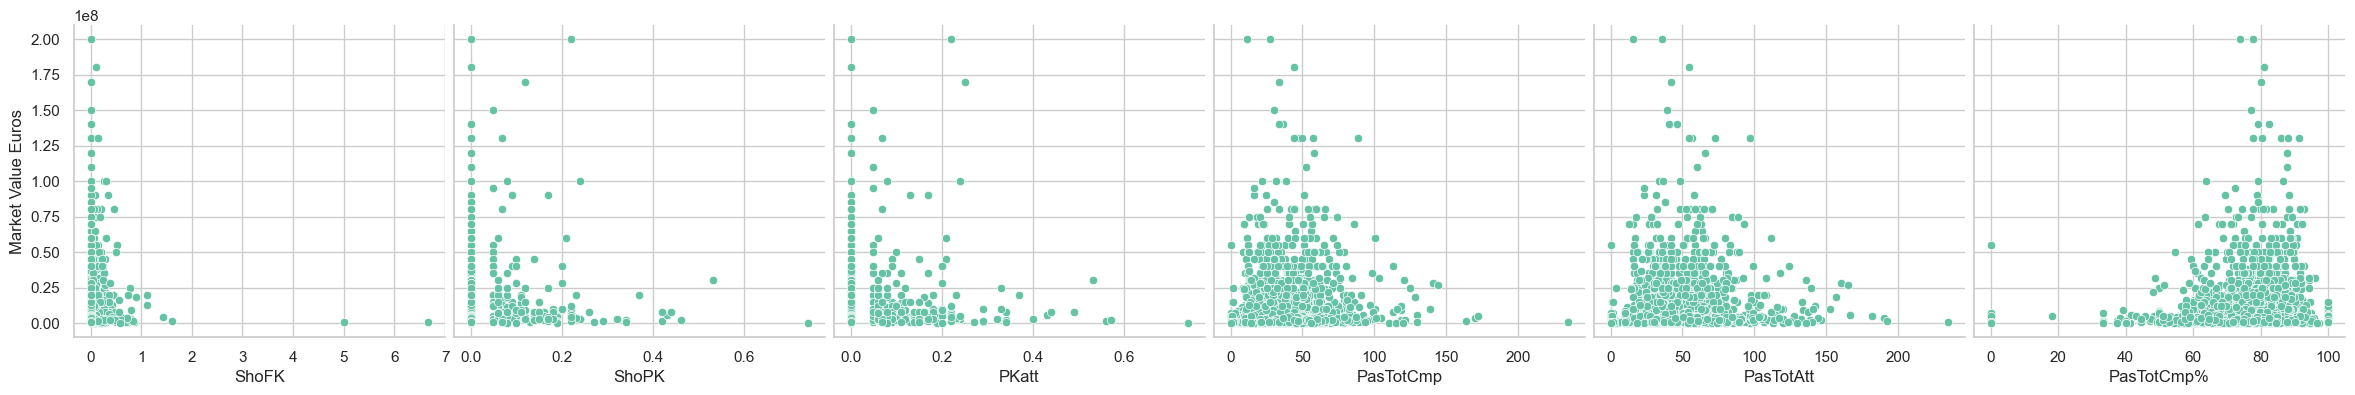

In [57]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%'], height = 4)


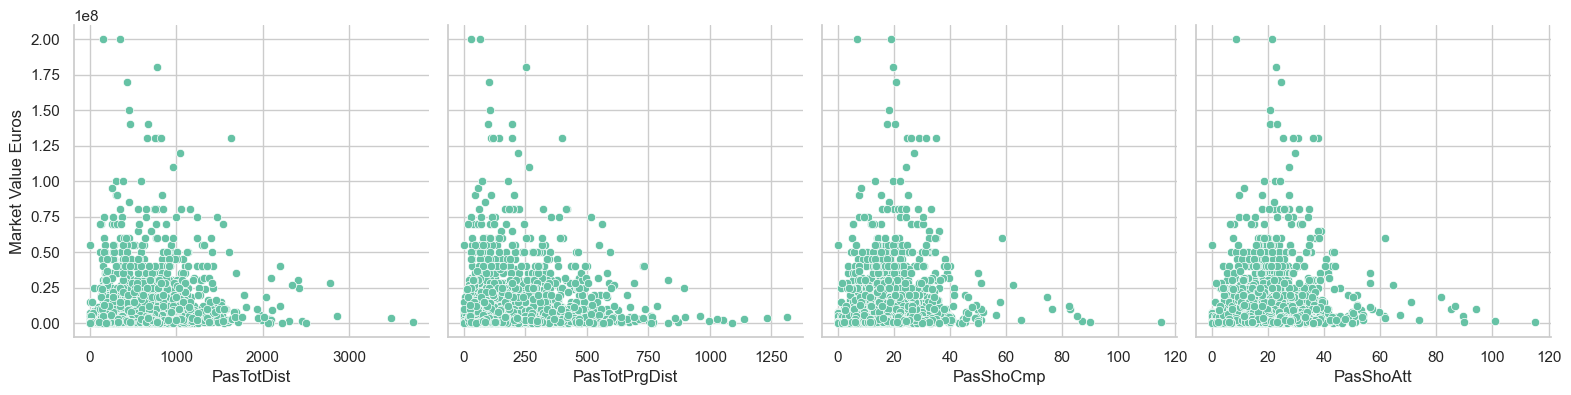

In [58]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt'], height = 4)


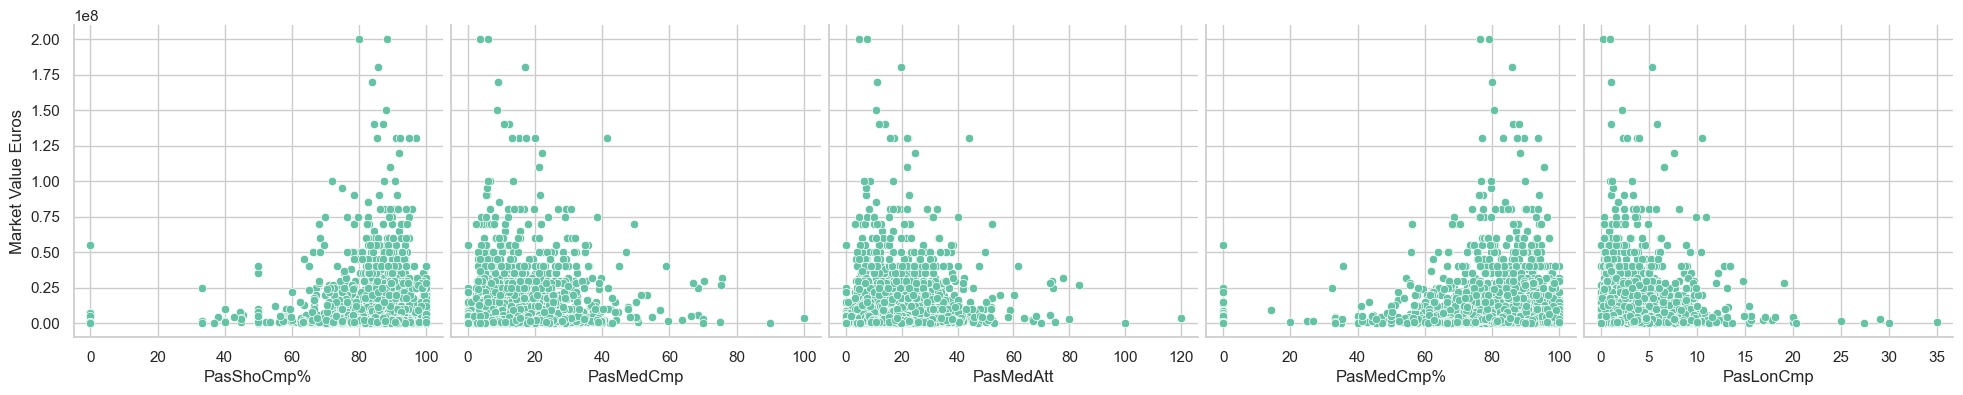

In [59]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp'], height = 4)


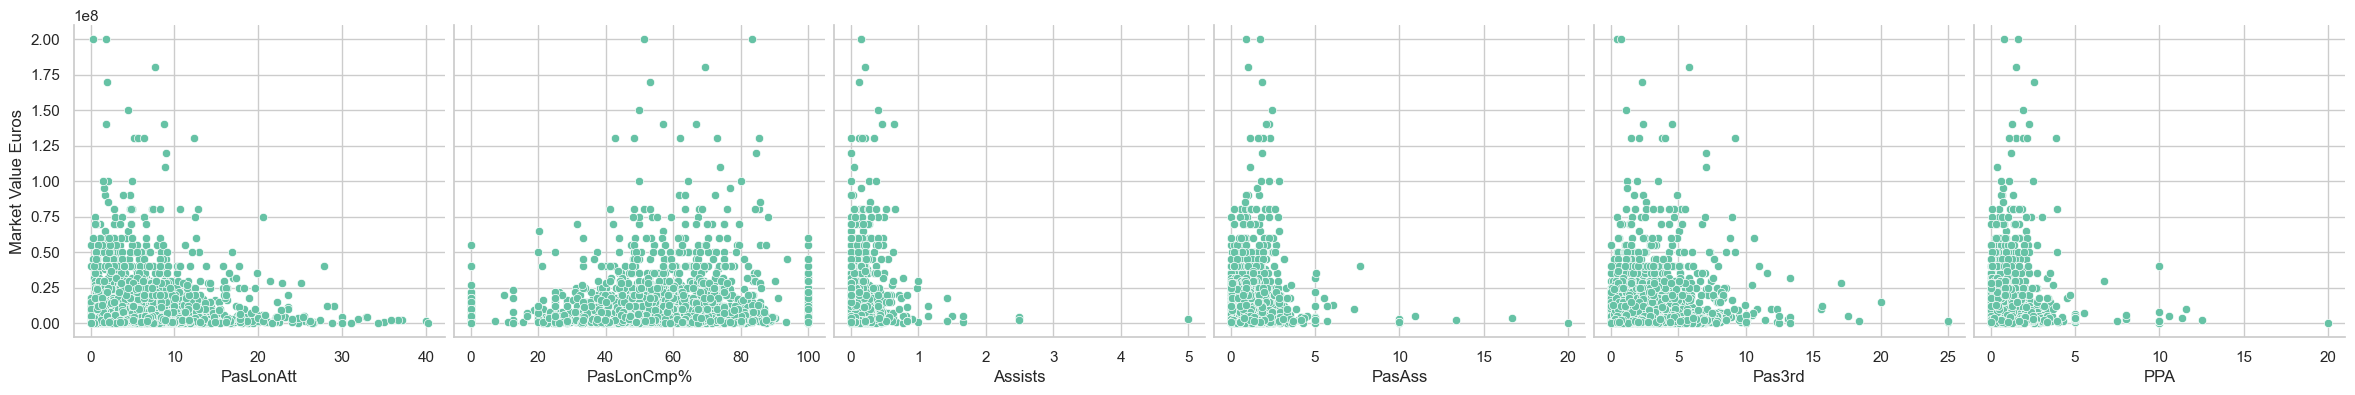

In [60]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA'], height = 4)


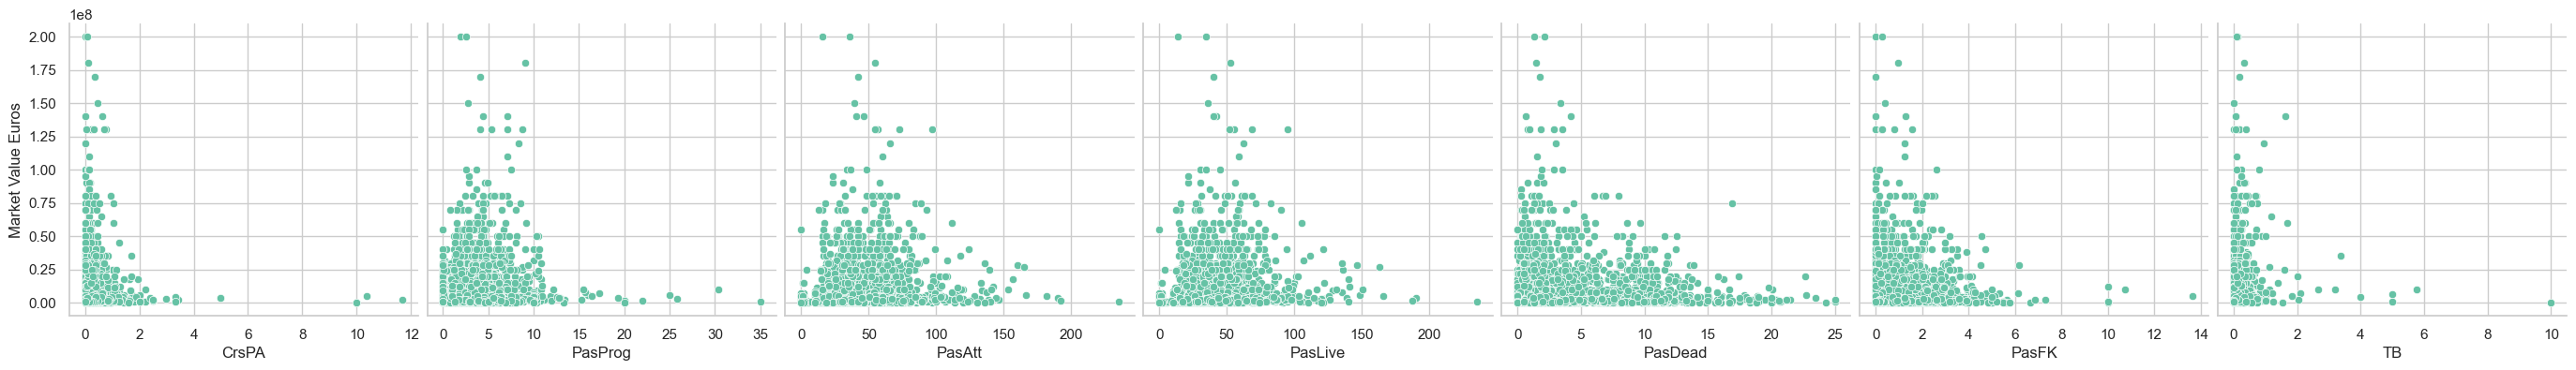

In [61]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB'], height = 4)


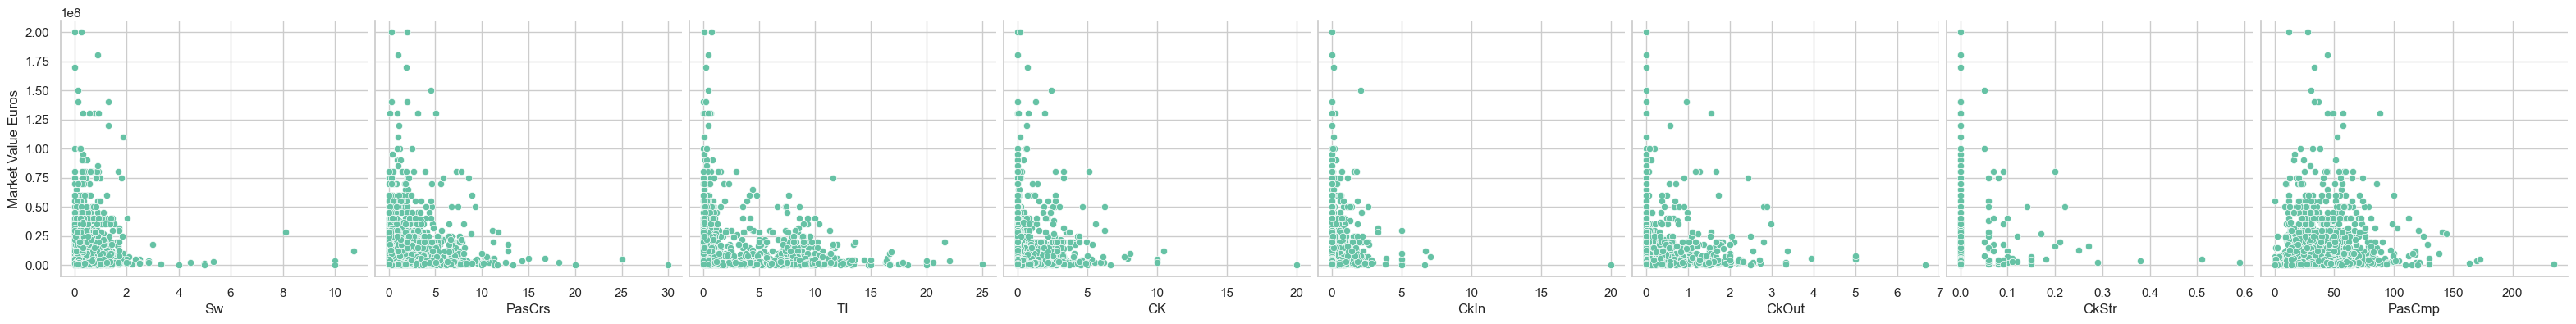

In [62]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['Sw', 'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp'], height = 4)


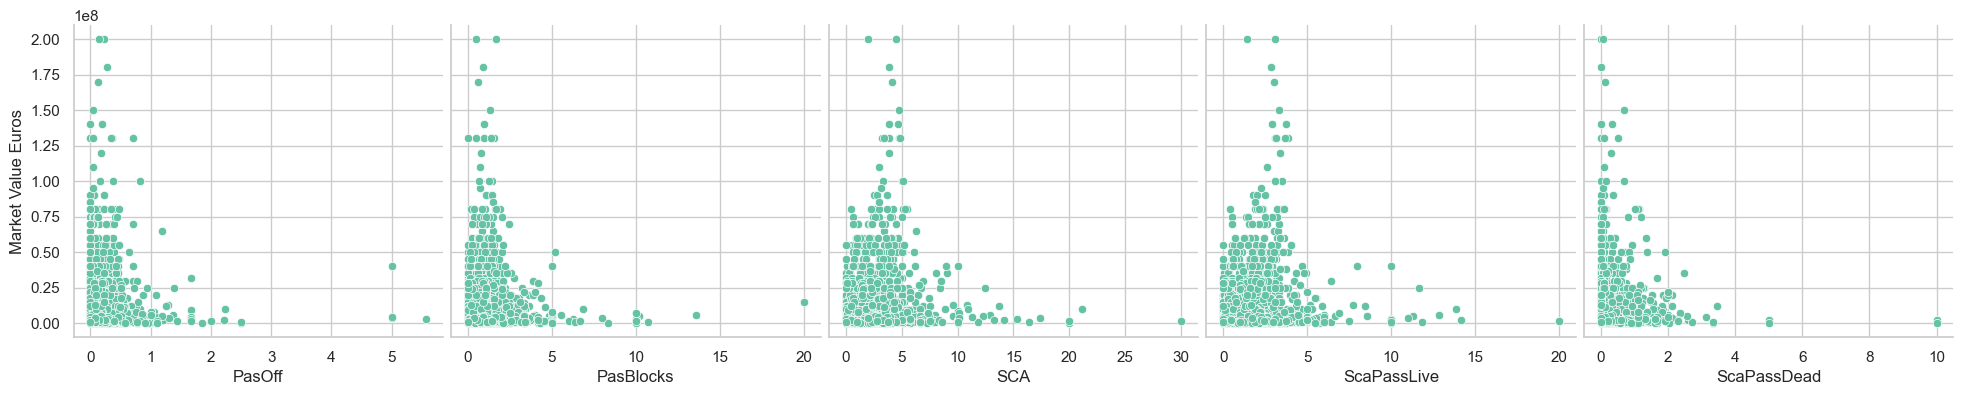

In [63]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['PasOff', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead'], height = 4)


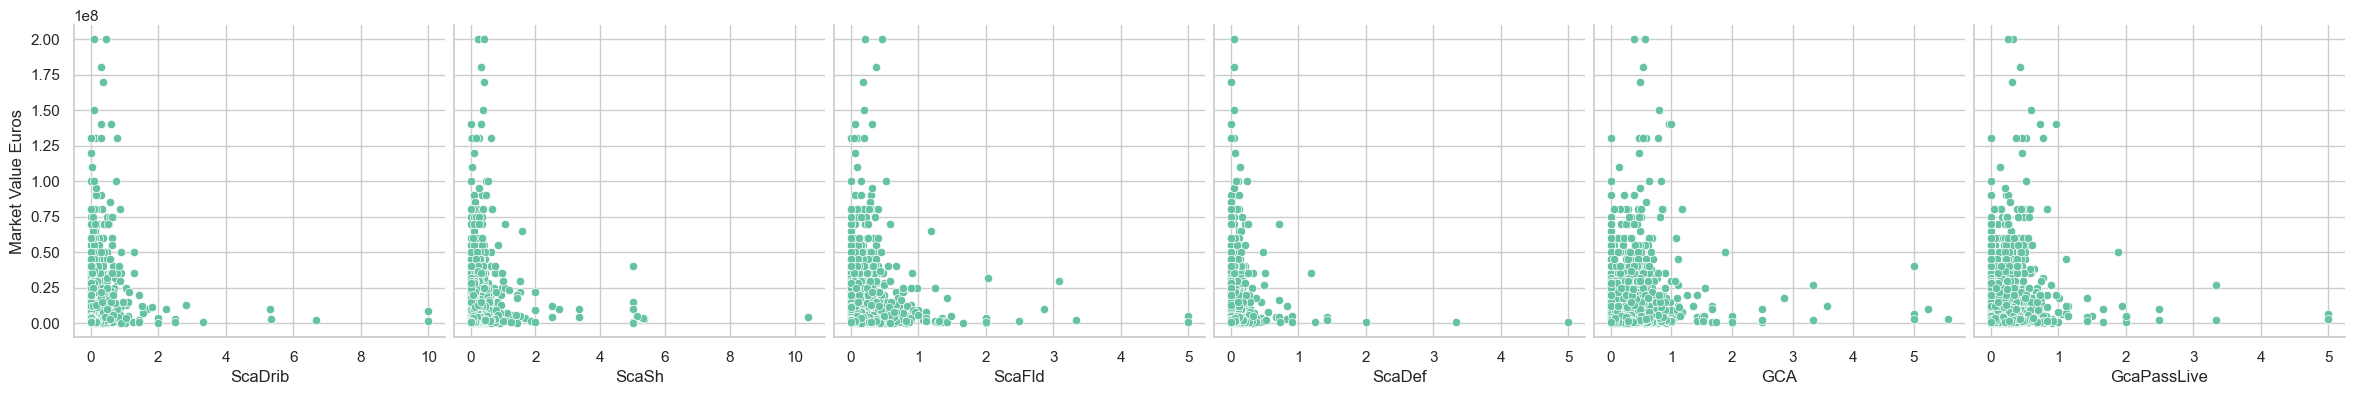

In [64]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive'], height = 4)


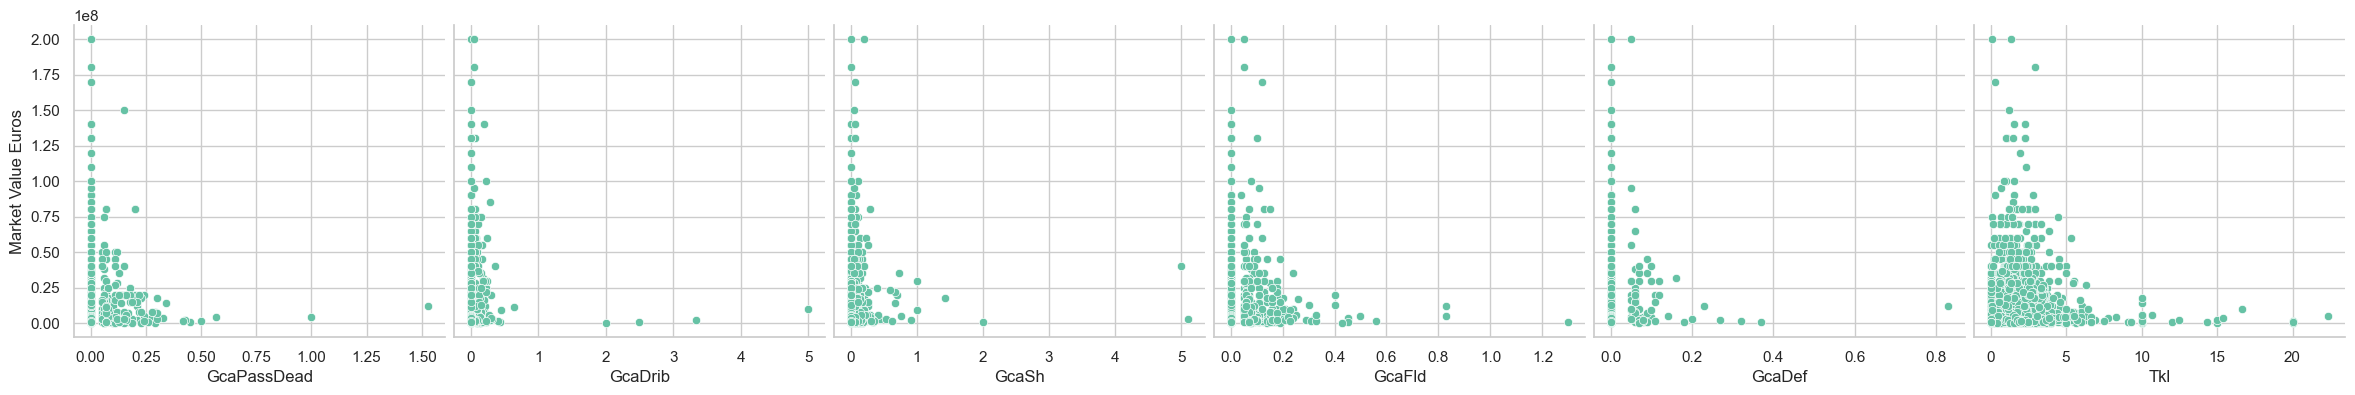

In [65]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl'], height = 4)


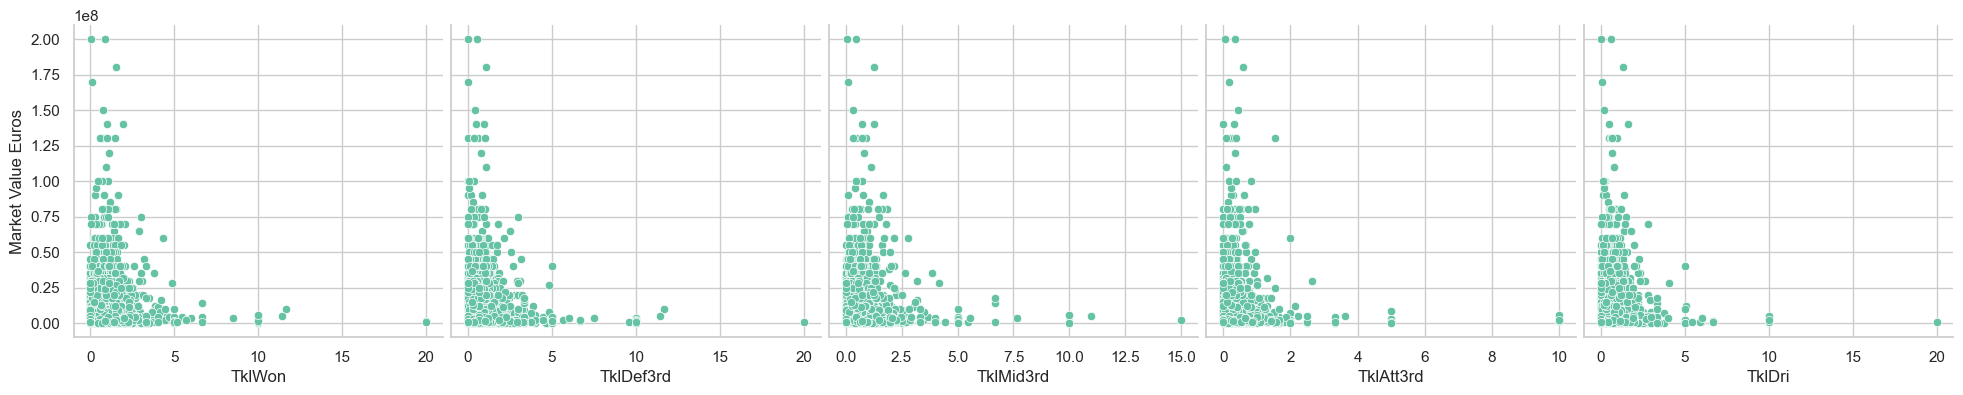

In [66]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri'], height = 4)


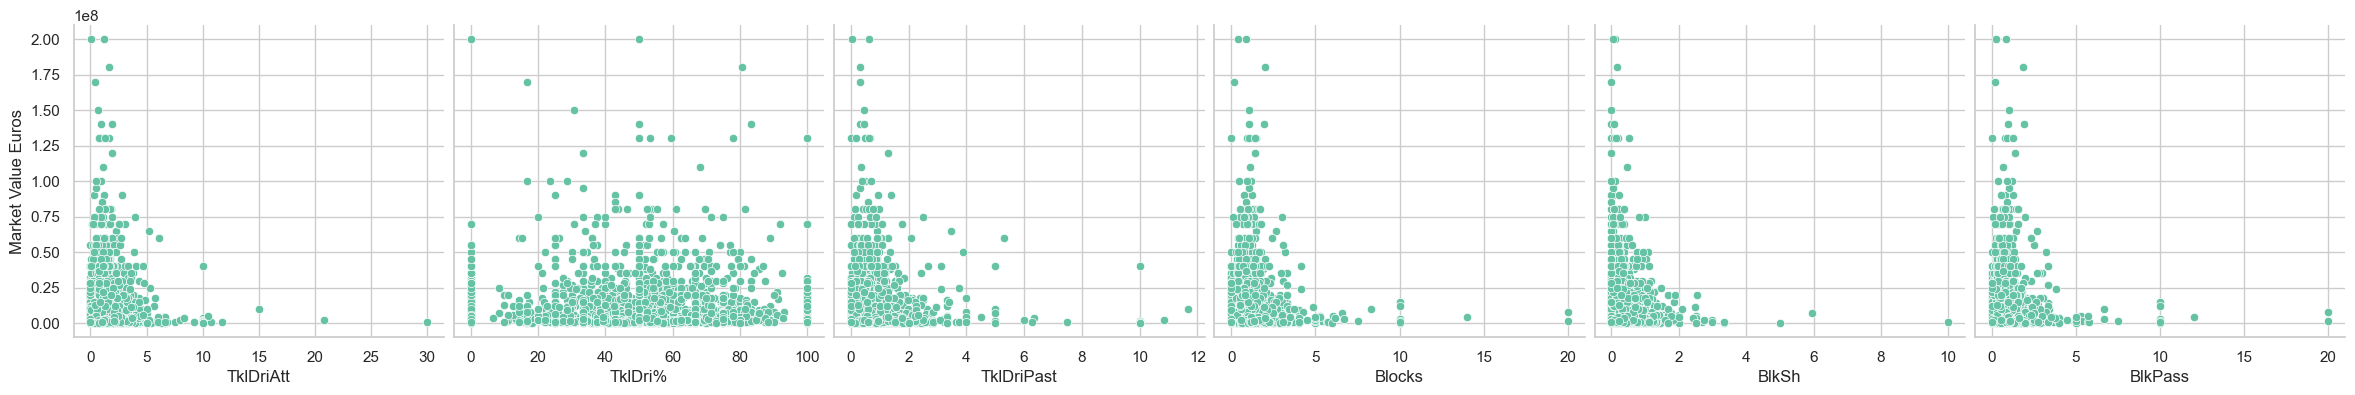

In [67]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass'], height = 4)


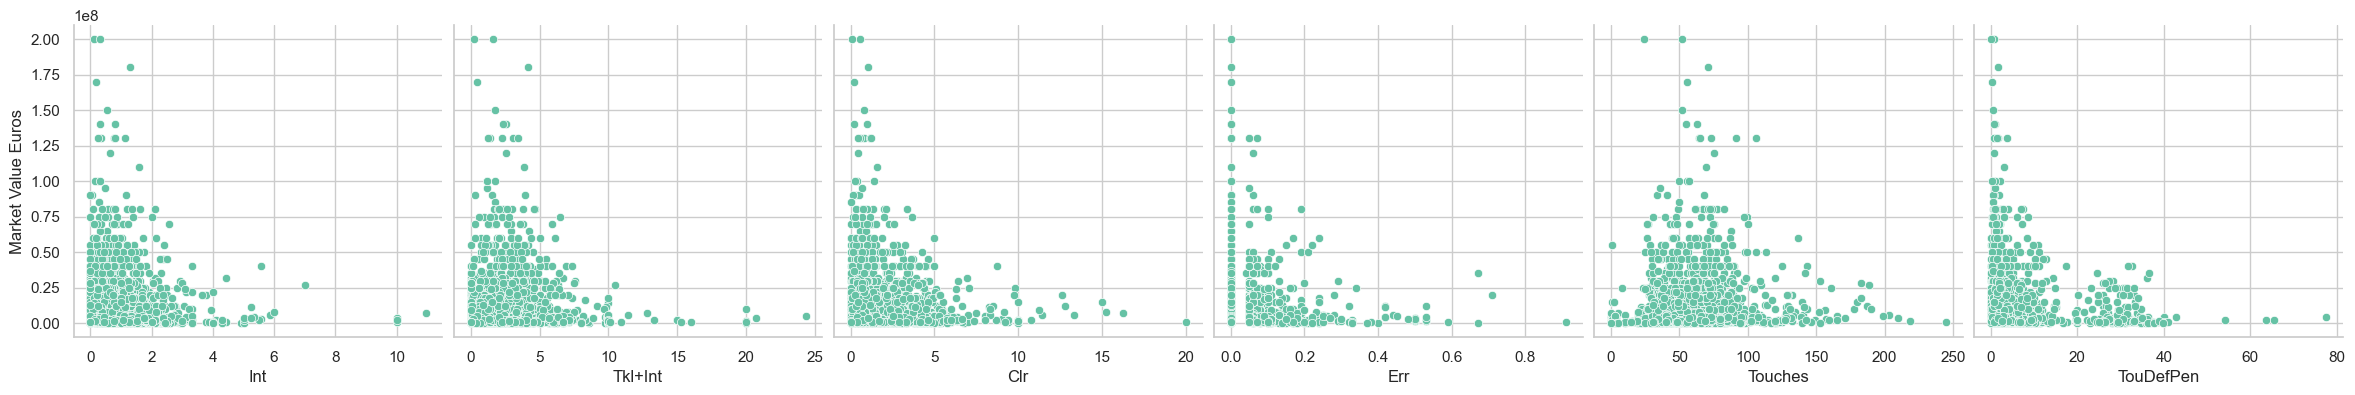

In [68]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['Int', 'Tkl+Int', 'Clr', 'Err', 'Touches', 'TouDefPen'], height = 4)


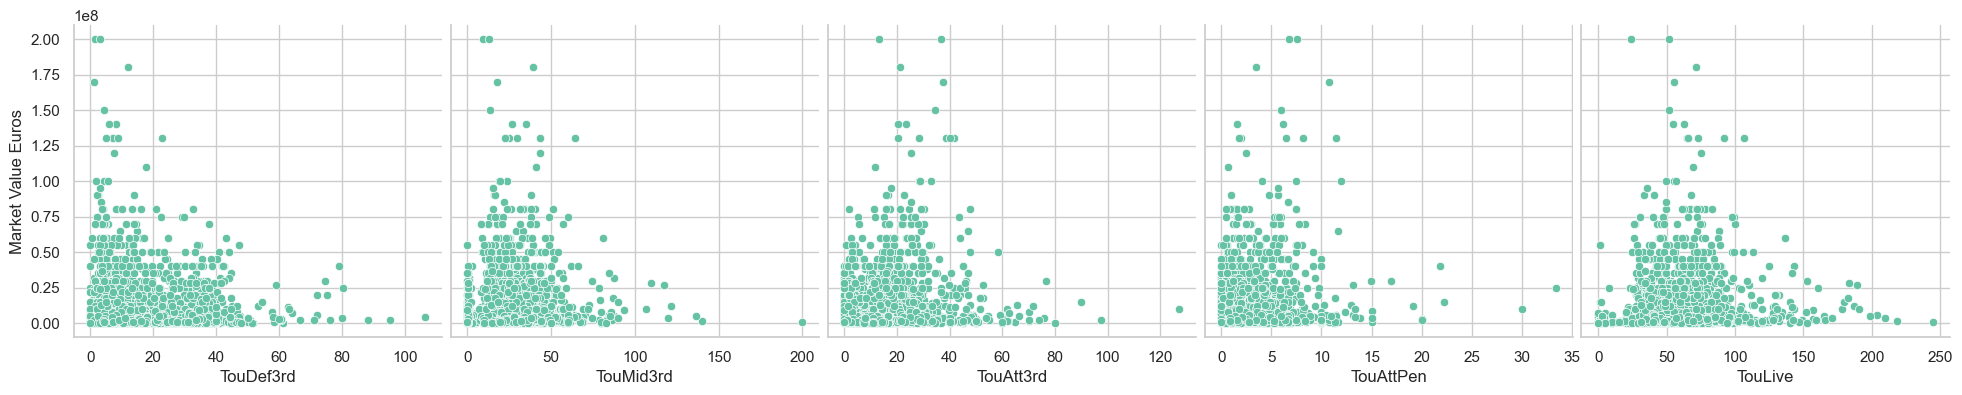

In [69]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 'TouAttPen', 'TouLive'], height = 4)


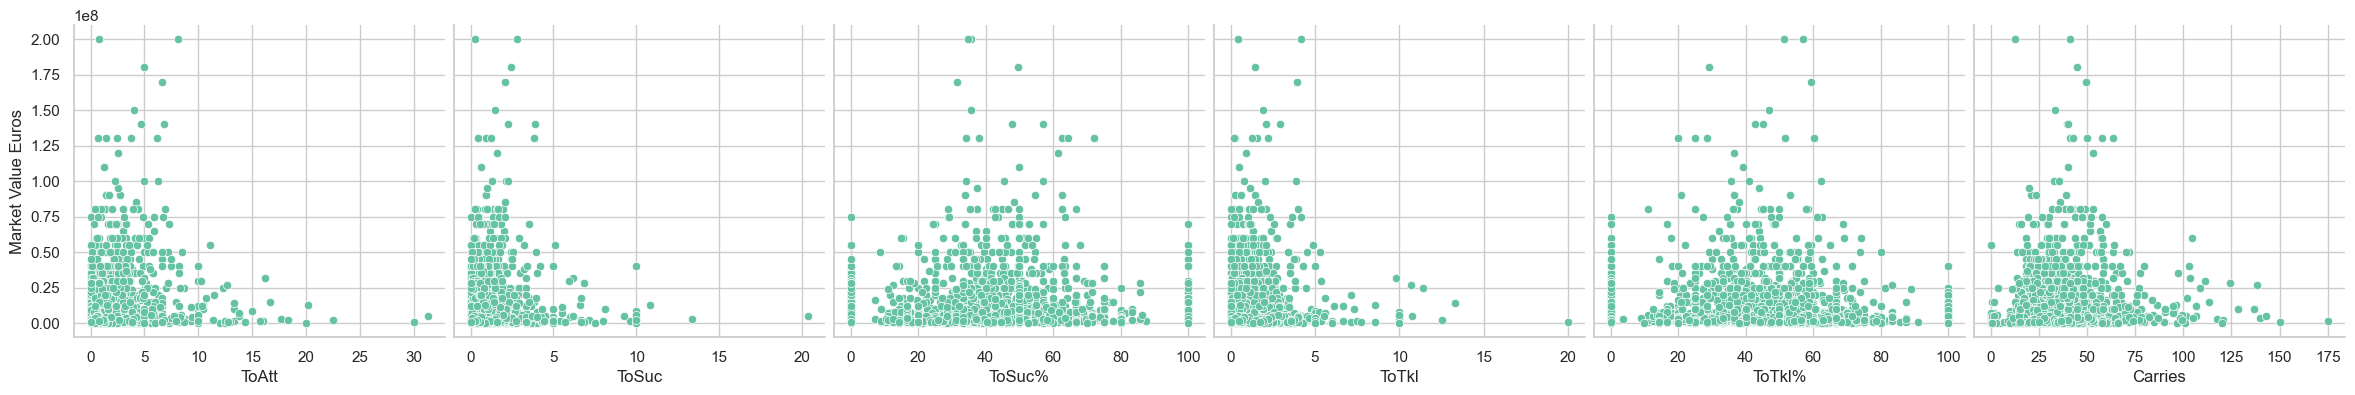

In [70]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['ToAtt', 'ToSuc', 'ToSuc%', 'ToTkl', 'ToTkl%', 'Carries'], height = 4)


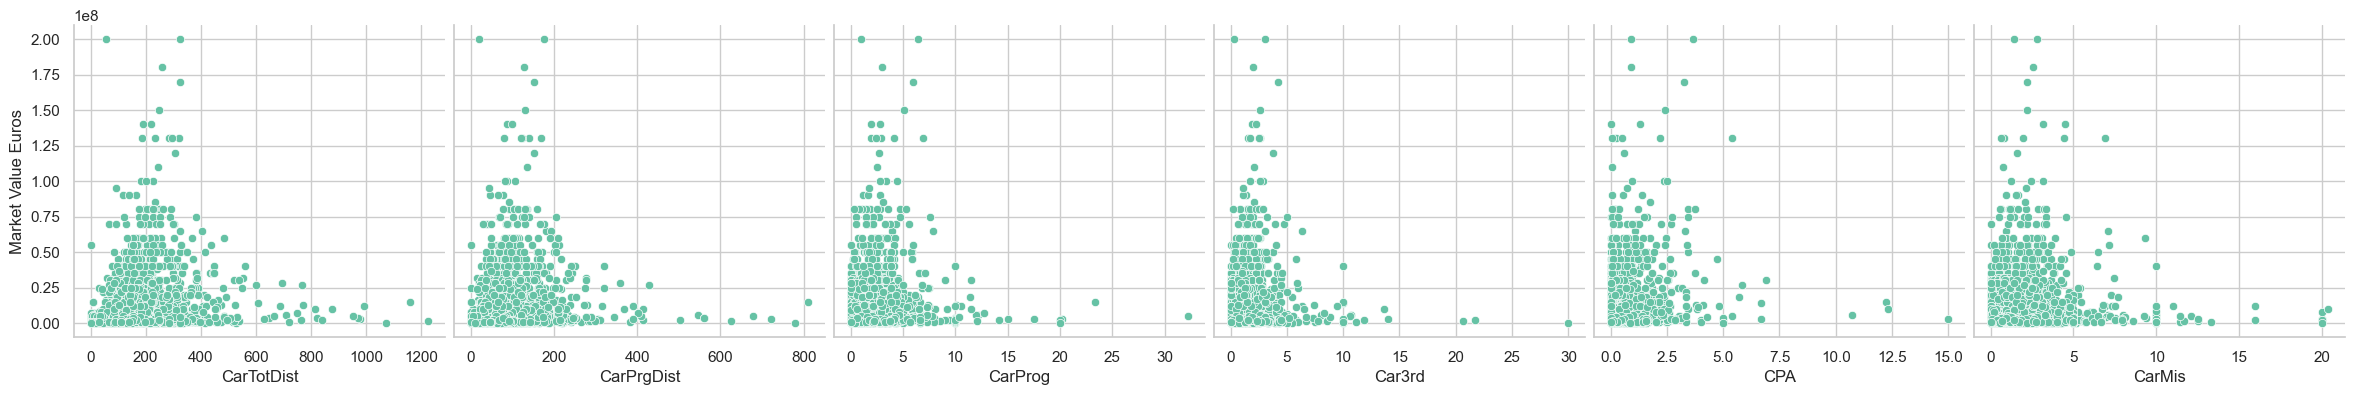

In [71]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['CarTotDist', 'CarPrgDist', 'CarProg', 'Car3rd', 'CPA', 'CarMis'], height = 4)


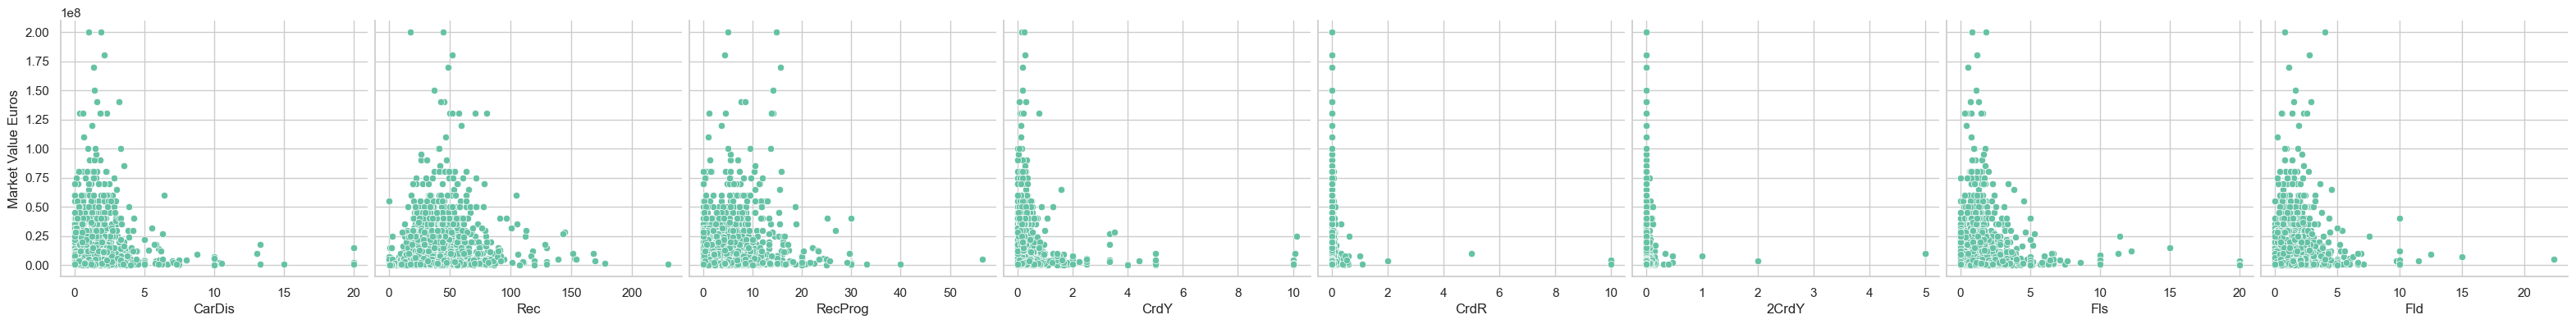

In [72]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['CarDis', 'Rec', 'RecProg', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld'], height = 4)


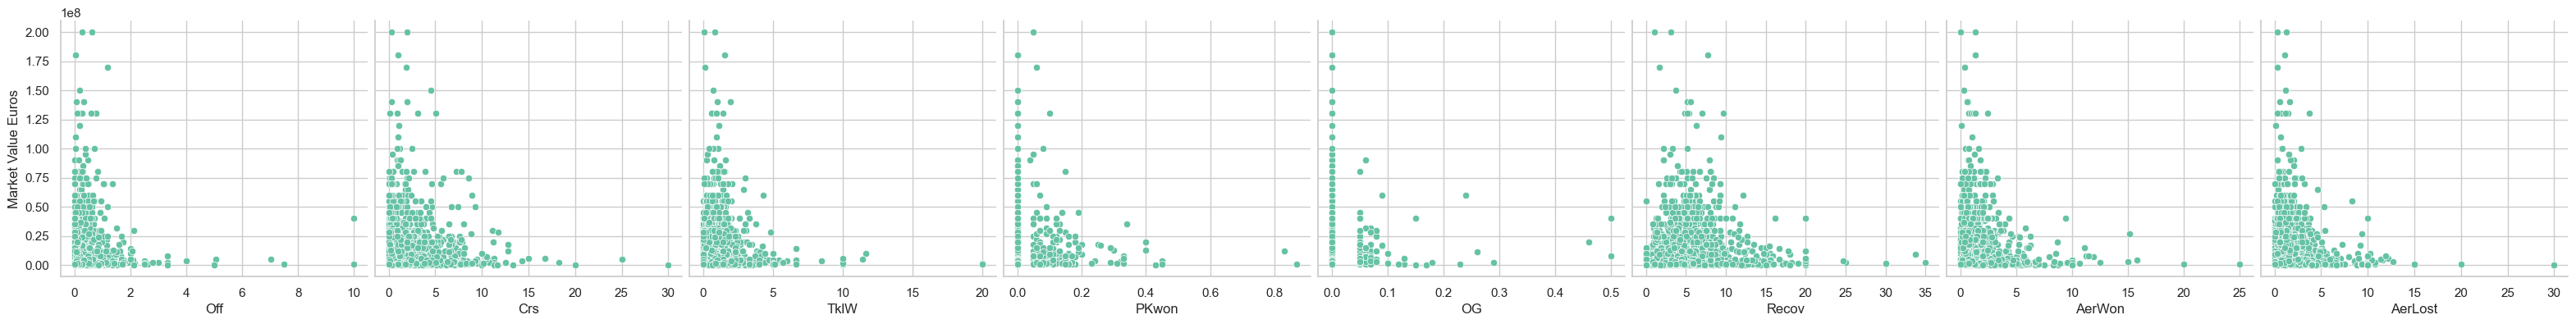

In [73]:
g = sns.pairplot(data=player_agg,y_vars=['Market Value Euros'],x_vars=['Off', 'Crs', 'TklW', 'PKwon', 'OG', 'Recov', 'AerWon', 'AerLost'], height = 4)
